In [1]:
# conda update scikit-learn

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
credit_card_fraud_data=pd.read_csv('../../card_transdata.csv')
credit_card_fraud_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
credit_card_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
credit_card_fraud_data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
credit_card_fraud_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizing Data 

# Univariate Analysis

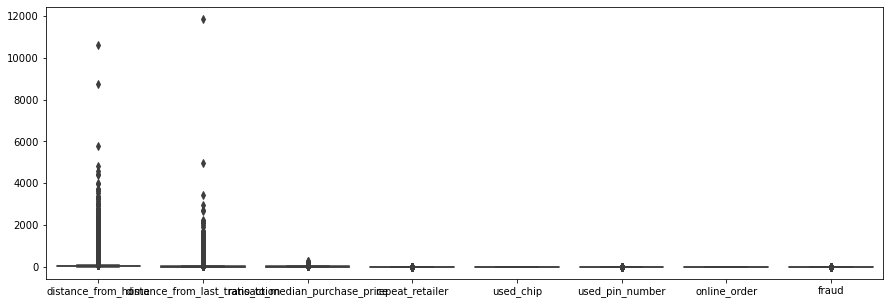

In [7]:
plt.figure(figsize=(15,5))
sns.boxplot(data=credit_card_fraud_data)
plt.show()

In [8]:
# plt.figure(figsize=(35,10))
# sns.boxplot(data=credit_card_fraud_data['distance_from_home'])
# plt.show()

In [9]:
# from the boxplot we can see that distance_from_home has outliers
q1 =credit_card_fraud_data['distance_from_home'].quantile(0.25)
q3 =credit_card_fraud_data['distance_from_home'].quantile(0.75)
iqr = q3-q1     # Inter-Quartile range

# By IQR Rule
UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

21.865977063715995 58.54295065212743 -28.920957602736546


In [10]:
credit_card_fraud_data[credit_card_fraud_data['distance_from_home']>UL]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
12,765.282559,0.371562,0.551245,1.0,1.0,0.0,0.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0,0.0
16,114.519789,0.707003,0.516990,1.0,0.0,0.0,0.0,0.0
20,78.623242,1.409245,1.838016,1.0,1.0,0.0,0.0,0.0
30,85.837253,1.035118,0.868296,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999924,108.428315,0.050380,0.595808,1.0,0.0,0.0,0.0,0.0
999941,142.526517,0.224511,0.368224,1.0,1.0,0.0,1.0,0.0


In [11]:
credit_card_fraud_data[credit_card_fraud_data['distance_from_home']>UL].count()['distance_from_home']

103631

In [12]:
#outlier removal from  distance_from_home
credit_card_fraud_data = credit_card_fraud_data[credit_card_fraud_data['distance_from_home']<UL] 
credit_card_fraud_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [13]:
# from the boxplot we can see that distance_from_home has outliers
q2 =credit_card_fraud_data['distance_from_last_transaction'].quantile(0.25)
q4 =credit_card_fraud_data['distance_from_last_transaction'].quantile(0.75)
iqr = q3-q1     # Inter-Quartile range

# By IQR Rule
UL1 = q2 + (1.5 * iqr)
LL1 = q4 - (1.5 * iqr)
print(iqr,UL1,LL1)

21.865977063715995 33.095383724400186 -29.442665317958873


In [14]:
credit_card_fraud_data[credit_card_fraud_data['distance_from_last_transaction']>UL1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
18,11.085152,34.661351,2.530758,1.0,0.0,0.0,1.0,0.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
155,3.357481,990.070315,3.157890,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
999762,13.366239,51.944082,0.507591,1.0,1.0,0.0,1.0,0.0
999832,30.068841,53.257849,3.728376,1.0,0.0,1.0,0.0,0.0
999869,58.359075,210.755452,1.778183,1.0,0.0,0.0,1.0,1.0
999909,19.404558,51.227662,0.207225,1.0,0.0,0.0,0.0,0.0


In [15]:
credit_card_fraud_data[credit_card_fraud_data['distance_from_last_transaction']>UL1].count()['distance_from_last_transaction']

22935

In [16]:
#outlier removal from  distance_from_home
credit_card_fraud_data = credit_card_fraud_data[credit_card_fraud_data['distance_from_last_transaction']<UL1] 
credit_card_fraud_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


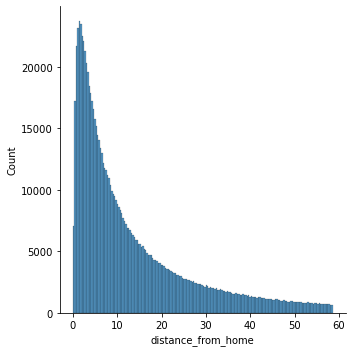

In [17]:
sns.displot(credit_card_fraud_data['distance_from_home']);

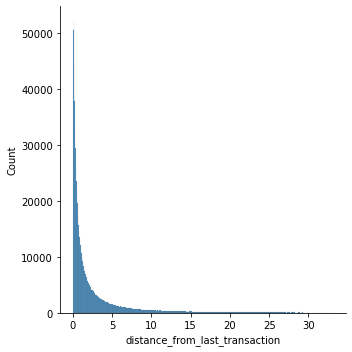

In [18]:
sns.displot(credit_card_fraud_data['distance_from_last_transaction']);

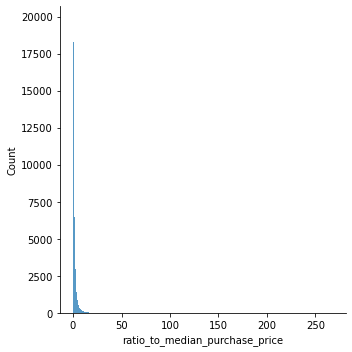

In [19]:
sns.displot(credit_card_fraud_data['ratio_to_median_purchase_price']);

C:\Users\shori\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


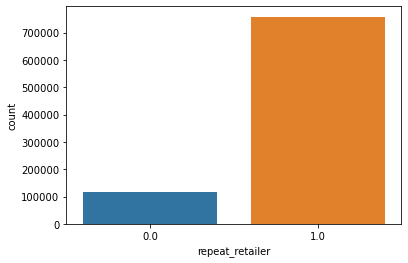

In [20]:
sns.countplot(credit_card_fraud_data['repeat_retailer']);

C:\Users\shori\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


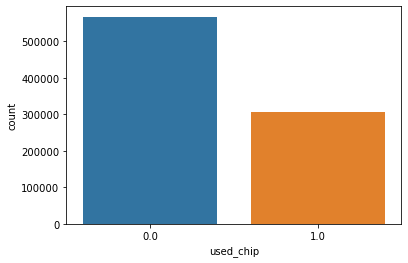

In [21]:
sns.countplot(credit_card_fraud_data['used_chip']);

C:\Users\shori\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


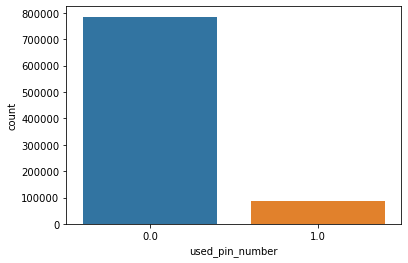

In [22]:
sns.countplot(credit_card_fraud_data['used_pin_number']);

C:\Users\shori\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


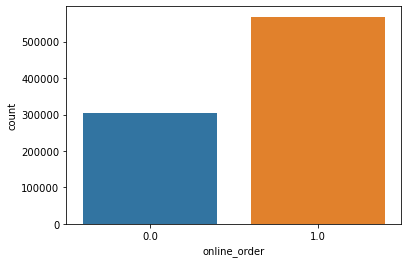

In [23]:
sns.countplot(credit_card_fraud_data['online_order']);

C:\Users\shori\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


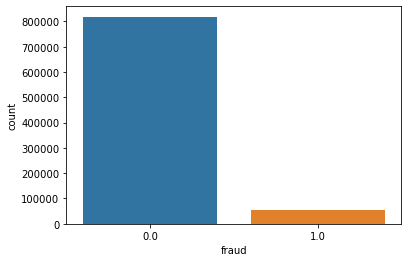

In [24]:
sns.countplot(credit_card_fraud_data['fraud']);

# Bivarate analysis

In [25]:
credit_card_fraud_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


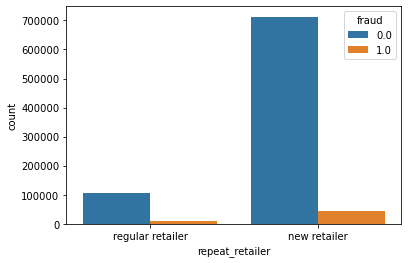

In [26]:
repeat_retailer_value=credit_card_fraud_data.repeat_retailer.value_counts()
ax = sns.countplot(data=credit_card_fraud_data,x='repeat_retailer', hue='fraud')
ax.set(xticks=[0,1], xticklabels=['regular retailer','new retailer'])
plt.show()

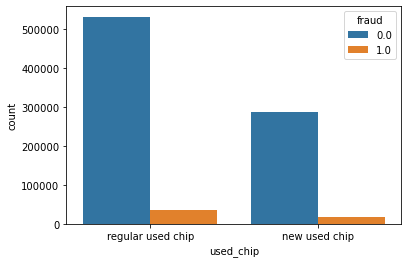

In [27]:
used_chip=credit_card_fraud_data.used_chip.value_counts()
ax = sns.countplot(data=credit_card_fraud_data,x='used_chip', hue='fraud')
ax.set(xticks=[0,1], xticklabels=['regular used chip','new used chip'])
plt.show()


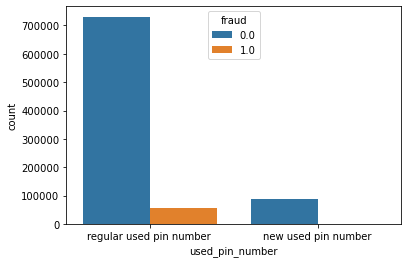

In [28]:
used_pin_number=credit_card_fraud_data.used_pin_number.value_counts()
ax = sns.countplot(data=credit_card_fraud_data,x='used_pin_number', hue='fraud')
ax.set(xticks=[0,1], xticklabels=['regular used pin number ','new used pin number'])
plt.show()


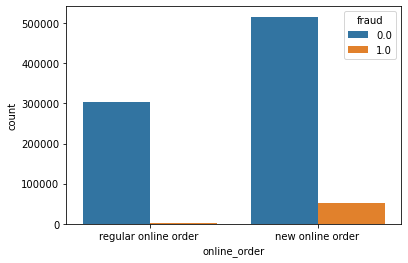

In [29]:
online_order=credit_card_fraud_data.online_order.value_counts()
ax = sns.countplot(data=credit_card_fraud_data,x='online_order', hue='fraud')
ax.set(xticks=[0,1], xticklabels=['regular online order ','new online order'])
plt.show()

In [30]:
# plt.scatter(x=credit_card_fraud_data['distance_from_home'],y=credit_card_fraud_data['fraud'])
# # sns.countplot(credit_card_fraud_data['online_order']);
# plt.title('distance_from_home v/s fraud ');

In [31]:
# plt.scatter(x=credit_card_fraud_data['distance_from_last_transaction'],y=credit_card_fraud_data['fraud'])
# plt.title('distance_from_last_transaction v/s fraud ');

In [32]:
# plt.scatter(x=credit_card_fraud_data['ratio_to_median_purchase_price'],y=credit_card_fraud_data['fraud'])
# plt.title('ratio_to_median_purchase_price v/s fraud ');

In [33]:
# plt.scatter(x=credit_card_fraud_data['repeat_retailer'],y=credit_card_fraud_data['fraud'])
# plt.title('repeat_retailer v/s fraud ');

In [34]:
# plt.scatter(x=credit_card_fraud_data['used_chip'],y=credit_card_fraud_data['fraud'])
# plt.title('used_chip v/s fraud ');

In [35]:
# plt.scatter(x=credit_card_fraud_data['repeat_retailer'],y=credit_card_fraud_data['fraud'])
# plt.title('repeat_retailer v/s fraud ');

# Cleaning data

In [36]:
credit_card_fraud_data.distance_from_home.unique()

array([57.87785658, 10.8299427 ,  5.09107949, ...,  2.91485699,
        4.25872939, 58.10812496])

In [37]:
len(credit_card_fraud_data.distance_from_home.unique())

873434

In [38]:
# no need to clean as whole data is numeric

# Converting categorical variable to dummy variaBLES

In [39]:
credit_card_fraud_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [40]:
credit_card_fraud_data['repeat_retailer'].unique()

array([1., 0.])

In [41]:
credit_card_fraud_data['used_chip'].unique()

array([1., 0.])

In [42]:
credit_card_fraud_data['used_pin_number'].unique()

array([0., 1.])

In [43]:
credit_card_fraud_data['online_order'].unique()

array([0., 1.])

# Making training and testing data sets 

In [44]:
features=credit_card_fraud_data.drop(['fraud'],axis=1)
labels=credit_card_fraud_data['fraud']

In [45]:
features

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [46]:
labels

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 873434, dtype: float64

# decision tree classifier

In [47]:
from sklearn.model_selection import train_test_split 
features_train , features_test , labels_train , labels_test = train_test_split(features,labels,test_size = 0.30) 

In [48]:
print("Traning Features = ",features_train.shape) 
print("Traning Labels    = ",labels_train.shape) 
print("Testing Features = ",features_test.shape) 
print("Testing Labels    = ",labels_test.shape) 

Traning Features =  (611403, 7)
Traning Labels    =  (611403,)
Testing Features =  (262031, 7)
Testing Labels    =  (262031,)


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
fraud_detector=DecisionTreeClassifier()

In [51]:
fraud_detector.fit(features_train,labels_train)

DecisionTreeClassifier()

Evaluating the model

In [52]:
fraud_detector.score(features_test,labels_test)

0.9999923673153176

In [53]:
labels_predict=fraud_detector.predict(features_test)

In [54]:
labels_predict.shape

(262031,)

In [55]:
labels_test

96029     0.0
575787    0.0
205357    0.0
273546    0.0
689792    0.0
         ... 
409550    0.0
793593    0.0
140670    0.0
723430    0.0
796335    0.0
Name: fraud, Length: 262031, dtype: float64

In [56]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(labels_test,labels_predict))

MSE: 7.632684682346746e-06


# Making predictions

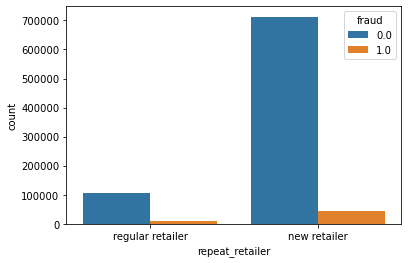

In [57]:
repeat_retailer_value=credit_card_fraud_data.repeat_retailer.value_counts()
ax = sns.countplot(data=credit_card_fraud_data,x='repeat_retailer', hue='fraud')
ax.set(xticks=[0,1], xticklabels=['regular retailer','new retailer'])
plt.show()

In [58]:
features.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

In [59]:
def Predict_Price():
        distance_from_home = int(input("Enter distance from home : "))
        distance_from_last_transaction = float(input("enter distance from last transaction  : "))
        ratio_to_median_purchase_price= float(input("enter ratio to median purchase price  : " ))
        repeatretailer = input("enter repeat retailer : ")
        if repeatretailer=="yes":
            repeat_retailer=1
        else:
            repeat_retailer=0
        chip = input("enter used chip : ")
        if chip=="yes":
            used_chip = 1
        else:
            used_chip = 0
            
        pin_number =input("enter same pin used or not:  ")
        if pin_number=="yes":
            used_pin_number = 1
        else:
            used_pin_number = 0
        
        onlineorder =input("enter online order:  ")
        if onlineorder=="yes":
            online_order= 1
        else:
            online_order = 0
            
        fraud=int(fraud_detector.predict([[distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order]]))
        
        if fraud ==0:
            
            print("Congratulation you are away from fraud transaction")
            print("\n \000200D ")
        else: 
            print("There is higher chances of having fraud transaction ")
            print("\n \U0001FAE8 ")
            
            
        
            
            
            
        

In [60]:
Predict_Price()

Enter distance from home : 32
enter distance from last transaction  : 12
enter ratio to median purchase price  : 43
enter repeat retailer : yes
enter used chip : yes
enter same pin used or not:  no
enter online order:  yes
There is higher chances of having fraud transaction 

 🫨 


C:\Users\shori\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [61]:
Predict_Price()

Enter distance from home : 34
enter distance from last transaction  : 65
enter ratio to median purchase price  : 45
enter repeat retailer : yes
enter used chip : yes
enter same pin used or not:  yes
enter online order:  yes
Congratulation you are away from fraud transaction

  200D 


C:\Users\shori\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
Predict_Price()

Enter distance from home : 34
enter distance from last transaction  : 54
enter ratio to median purchase price  : 67
enter repeat retailer : no
enter used chip : no
enter same pin used or not:  yes
enter online order:  yes
Congratulation you are away from fraud transaction

  200D 


C:\Users\shori\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [63]:
from joblib import dump,load
dump(fraud_detector,'credit_card_fraud_detection')

['credit_card_fraud_detection']

In [64]:
# !pip install scikit-learn==1.3.2

In [65]:
# pip show scikit-learn